Enter the excel file name (for e.g. 'demo.xlsx') which have value of x and ycircle.xlsx
 Enter the speed of the end effector  or Enter 100 for no effect of dynamics: 100


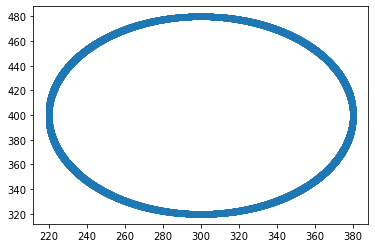

[[380.         400.        ]
 [379.99993683 400.10053094]
 [379.99974734 400.20106172]
 ...
 [379.99943151 399.69840782]
 [379.99974734 399.79893828]
 [379.99993683 399.89946906]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import cv2
import pandas as pd


from render import Renderer
# Renderer is a class(package) which helps to plot in cv2
class object(Renderer):
    def __init__(self,traject, recordLocation = None):
        super().__init__(recordLocation=recordLocation)
        self.its = 0
        self.q1 = 0     # q1 is the angle made by the first limb of manipulator with x axis
        self.q2 = 0     # q2 is the angle made by the second limb of manipulator with x axis
        self.theta = 0  # theta is the angle made by the limb 2 w.r.t to limb 1
        self.l1 = 200   # length of the first limb
        self.l2 = 380   # length of the second limb
        self.points = set()
        self.traject = traject
    def getInfo(self):
        info = {
            'q1':round(self.q1,4),
            'q2':round(self.q2,4), 
            'x': round(self.x,4),
            'y': round(self.y,4),
        }
        return info
    def plot(self):
        data = self.traject
        plt.scatter(data[:,0],data[:,1])
        plt.show()
        return data
        
    def step(self):
        self.x = self.traject[self.its,0]
        self.y = self.traject[self.its,1]
        
        self.theta=(math.acos(((self.x)**2+(self.y)**2-(self.l1)**2-(self.l2)**2)/(2*self.l1*self.l2))) 
        self.q1=math.atan((self.y)/(self.x))-math.atan((self.l2*math.sin(self.theta))/(self.l1+(self.l2*math.cos(self.theta))))
        self.q2=(self.q1+self.theta)
        
        # (x1,y1) is the coordinate of the joint 1
        self.x1 = self.l1*math.cos(self.q1)
        self.y1 = self.l1*math.sin(self.q1)
        
        # (x2,y2) is the coordinate of the joint 2
        self.x2 = self.x1+self.l2*math.cos(self.q2)
        self.y2 = self.y1+self.l2*math.sin(self.q2)
        self.its+=1
        
        self.points.add((self.q1,self.q2,self.x1,self.y1,self.x2,self.y2))
    def draw(self,image):
        for q1,q2,x1,y1,x2,y2 in self.points:

            cv2.line(image,(0,0),(int(self.x1),int(self.y1)),(0,255,0),2) # limb1
            cv2.line(image,(int(self.x1),int(self.y1)),(int(self.x2),int(self.y2)),(0,0,255),2) # limb2
            cv2.circle(image,(int(x2),int(y2)),2,(255,0,0),-1)  # trajectory traced by our manipulator
            
        return image 

user = input("Enter the excel file name (for e.g. 'circle.xlsx') which have value of x and y: ")
pf = pd.read_excel(user)
data_x_y = pf.to_numpy() # converting the dataframe into numpy array
anim = object(data_x_y, recordLocation ='anim.mp4')
speed = int(input(" Enter the speed of the end effector  or Enter 100 for no effect of dynamics: "))
# print(data_x_y.shape[0])
k=speed
if speed >100:
    k=100
for i in range(0,data_x_y.shape[0]):
    anim.step()
    
    # drawing the every 5th points to run faster (IF you want to run all your points then please ccomment if statement and run anim.render)
    if i%5==0:
        anim.render(height=600,pause=int(100/k))
print(anim.plot())  # plotting the actual trajectory from the given data points
        
        